<a href="https://colab.research.google.com/github/nhi-02/PyTorchww/blob/main/ichi_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

# Data (prepare and load)

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Split the dataset
Train set 60-80%       | Always

Validation set 10-20%  | Often

Test set 10-20%        | Always

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] # from 0 to 80%
X_test, y_test = X[train_split:], y[train_split:] # from 80% to 100%

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# Better visualize data
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    """
    Plot training data and test data and compares predictions
    """
    plt.figure(figsize=(10, 8))

    # Plot training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_label, c="y", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red if they exist (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    # Show the legend
    plt.legend(prop={"size": 14})

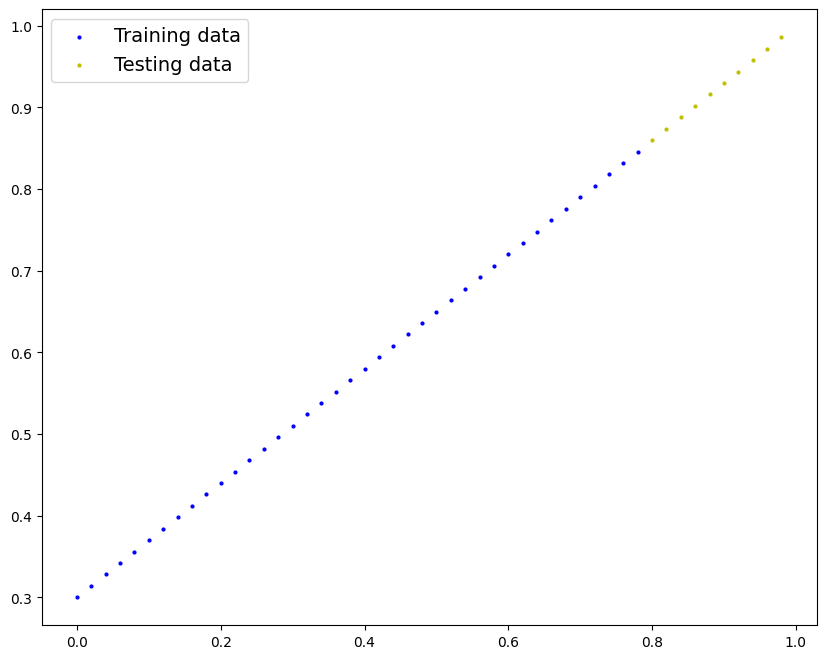

In [ ]:
plot_predictions()

## Creating PyTorch models

In [ ]:
from torch import nn

# Linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor)  -> torch.Tensor:
    return self.weights * x + self.bias # linear regression formula

## PyTorch model buiding enssentials
- torch.nn - contains all of the buidings for computational graphs (a neural network can be considered a computational graph)

- torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

- torch.nn.Module - the base class for all neural network modules. if subclass it, should overwrite forward()

- torch.optim - this where the optimizers in  PyTorch live, they will hepl with gradient decsent

- def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Model - what inside...

In [ ]:
# Create a random seed
import torch
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Maiking prediction using `torch.inference_mode()`

In [ ]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

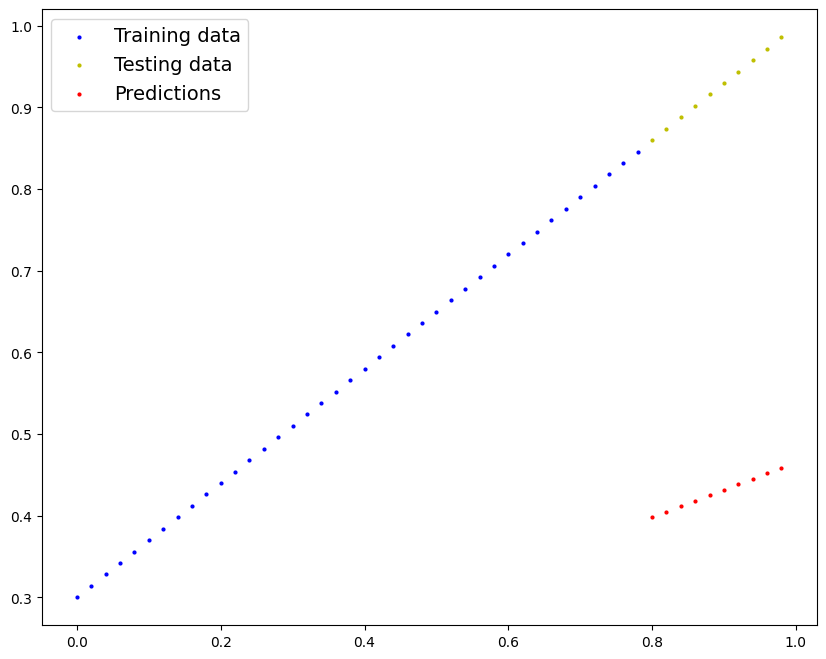

In [ ]:
plot_predictions(predictions=y_preds)